<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-loading-the-datasets" data-toc-modified-id="Imports-and-loading-the-datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and loading the datasets</a></span></li><li><span><a href="#Exploring-the-words-in-the-dataset" data-toc-modified-id="Exploring-the-words-in-the-dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring the words in the dataset</a></span></li><li><span><a href="#Looking-at-the-length-of-the-texts-and-headlines" data-toc-modified-id="Looking-at-the-length-of-the-texts-and-headlines-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Looking at the length of the texts and headlines</a></span></li><li><span><a href="#Analyzing-the-first-paragraph-of-the-articles" data-toc-modified-id="Analyzing-the-first-paragraph-of-the-articles-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyzing the first paragraph of the articles</a></span></li></ul></div>

# Imports and loading the datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import os

In [3]:
interim_data_dir = '../data/interim'

In [4]:
folha_articles = pd.read_csv(os.path.join(interim_data_dir, 'news-of-the-site-folhauol/articles.csv'))

In [5]:
headlines = folha_articles['title']
news_text = folha_articles['text']

# Exploring the words in the dataset

In [6]:
print("There are {} observations in the dataset".format(len(headlines)))

There are 167053 observations in the dataset


In [7]:
headlines_word_counter = Counter()
for headline in headlines:
    for word in headline.split():
        headlines_word_counter[word]+=1

print("There are {} unique words in the headlines".format(len(headlines_word_counter)))

There are 104203 unique words in the headlines


In [8]:
headlines_word_counter.most_common(10)

[('de', 98200),
 ('e', 38339),
 ('em', 34456),
 ('do', 33008),
 ('da', 28318),
 ('a', 25140),
 ('para', 22678),
 ('no', 19853),
 ('que', 18890),
 ('na', 18566)]

In [9]:
#rarest words
sorted(headlines_word_counter, key=lambda k: headlines_word_counter[k])[:20]

["'lascado',",
 "'Decidi",
 "sofrem',",
 'Oumou',
 'Sangaré',
 'definitivo;',
 'CBSS',
 'Business',
 'Saud,',
 '166%',
 "manipulado',",
 'Pigossi',
 'revogado,',
 'Insolvente,',
 'arauto',
 "punitiva',",
 'falsear',
 'emprego:',
 'ainda)',
 'separatismo,']

We already can see a punctuation problem here, note the "word" ainda), it was supposed to be the word ainda plus the punctuation ). We can, in the preprocessing part, separate punctuations with whitspaces since in portuguese we don't have compressed words such as "it's".

In [10]:
print("Number of NaN texts: {}, representing {:.2f}% of the entire corpus"
      .format(folha_articles['text'].isna().sum(), 100*folha_articles['text'].isna().mean()))

Number of NaN texts: 765, representing 0.46% of the entire corpus


In [11]:
text_word_counter = Counter()
for text in news_text:
    if pd.isna(text):
        continue
    for word in text.split():
        text_word_counter[word]+=1
        
print("There are {} unique words in the news texts".format(len(text_word_counter)))

There are 1332521 unique words in the news texts


In [12]:
text_word_counter.most_common(10)

[('de', 3437457),
 ('a', 2178138),
 ('o', 1892559),
 ('que', 1780232),
 ('e', 1633118),
 ('do', 1341421),
 ('da', 1168380),
 ('em', 993609),
 ('para', 826214),
 ('com', 668162)]

In [13]:
#rarest words
sorted(text_word_counter, key=lambda k: headlines_word_counter[k])[:20]

['(9),',
 'inflamado',
 '"lascado",',
 'desidratando-o,',
 'inclusive,',
 'alternativo,',
 '(PT),',
 'Presidência.',
 'lascado,',
 'processo.',
 'absolva,',
 'desculpas",',
 'Brasília.',
 '[investigadores]',
 'dizer:',
 "'Ah,",
 "eleitoral'.",
 'Testem",',
 'petista.',
 '"mentiras']

# Looking at the length of the texts and headlines

In [14]:
folha_articles['headline_length'] = pd.Series([len(headline.split()) for headline in headlines])
folha_articles['text_length'] = pd.Series([len(text.split()) if not pd.isna(text) else 0 for text in news_text])

Does large text implies larger headlines?

In [15]:
print("Pearson correlation for the length of the text and the headline: {:.2f}"
      .format(folha_articles.corr().loc['text_length', 'headline_length']))

Pearson correlation for the length of the text and the headline: 0.03


It looks like the length of the text doesn't affect at all the length of the headline

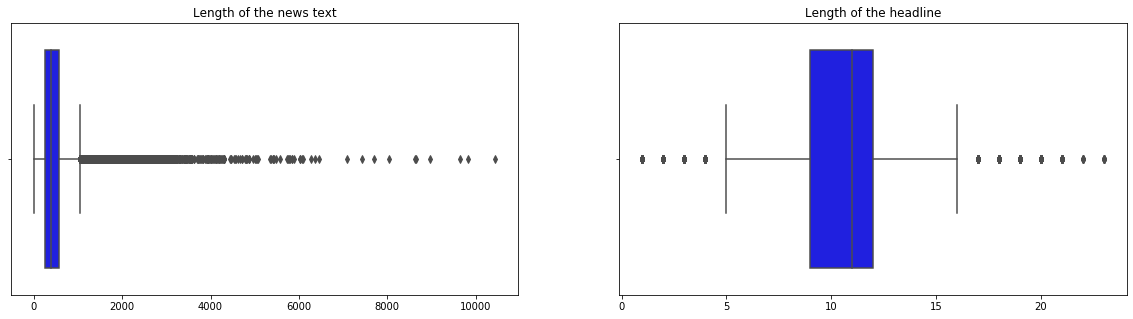

In [16]:
fig, axes = plt.subplots(1, 2, figsize=[20,5])
sns.boxplot(folha_articles['text_length'], color='blue', ax=axes[0])
sns.boxplot(folha_articles['headline_length'], color='blue', ax=axes[1])
axes[0].set_title('Length of the news text')
axes[1].set_title('Length of the headline')
axes[0].set_xlabel('')
axes[1].set_xlabel('');

Looks like we have some outliers in the length's of the news text, let's see the article with maximum length, over 10000 words!

In [17]:
max_length_idx = folha_articles[folha_articles['text_length']==folha_articles['text_length'].max()].index

In [18]:
folha_articles['text'].loc[max_length_idx].tolist()

['A Folha oferece serviço de esclarecimento de dúvidas dos leitores sobre como preencher a declaração do IR 2016 -referente a rendimentos de 2015. O serviço será publicado até 29 de abril, último dia para o envio da declaração à Receita. As respostas, dadas pelos consultores da IOB/Sage, serão publicadas no caderno Mercado, de terça-feira a sábado, e compiladas nesta página.  As novas perguntas e respostas são adicionadas ao pé da página.  Perguntas devem ser enviadas para o e-mail mercado.folha@uol.com.br.  Outras perguntas e respostas podem ser acessadas por aqui.  *  1 - Vendi imóvel para pagar R$ 400 mil ao Banco do Brasil para baixa de hipoteca. Há isenção do Imposto de Renda sobre o ganho de capital? (L.V.G.)  Não. A isenção sobre o ganho de capital não se aplica à hipótese de venda de imóvel para quitar dívidas com bancos. Preencha o programa GCap/2015, calcule o ganho de capital (pague o IR, se houver e se ainda não o fez) e importe os dados para o Demonstrativo de Ganho de Cap

It is an article about question readers had about taxes so, indeed, it is expected to have this many words.

# Analyzing the first paragraph of the articles

Let's see if the first paragraph contains enough information to generate the headline

In [19]:
idx = np.random.choice(np.arange(len(headlines)), size=1)

In [20]:
print(headlines.tolist()[idx[0]])

Acesso a sites de notícias por smartphones cresce nos EUA


In [21]:
print(news_text.tolist()[idx[0]].split('  ')[0])

Neste início de 2015, dos 50 maiores sites noticiosos dos Estados Unidos, 39 já são mais acessados por aparelhos móveis, como "smartphones", do que por computadores.


We can see that, in most cases, the first paragraph already has enough information to generate our headlines, so, when building the model, we are just going to focus on those.

Let's now look at the length of those first paragraphs

In [22]:
first_paragraph_len = [len(stn.split('  ')[0].split(' ')) for stn in news_text if not pd.isna(stn)]

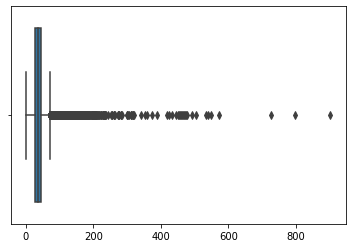

In [23]:
sns.boxplot(first_paragraph_len)

In [24]:
np.quantile(first_paragraph_len, 0.95)

65.0